In [302]:
import pandas as pd 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

In [303]:
data=pd.read_csv("customer_data.csv")
data.head()

,age,salary,purchased
0,44,39000,0
1,32,120000,1
2,38,50000,0
3,32,135000,1
4,52,21000,1


In [304]:
X = data.drop(["purchased"],axis="columns")
Y = data["purchased"]

In [305]:
train_test_split(X,Y,train_size = 0.8)

[     age  salary
 355   45   32000
 289   49   88000
 230   30  116000
 32    24   19000
 337   34   43000
 ..   ...     ...
 19    47   51000
 188   35   55000
 298   27   54000
 343   35   20000
 318   55  130000
 
 [320 rows x 2 columns],
      age  salary
 396   23   63000
 357   26   80000
 262   41   30000
 263   37   93000
 283   39   79000
 ..   ...     ...
 154   42   75000
 389   41   60000
 377   40   60000
 353   34  115000
 379   47  107000
 
 [80 rows x 2 columns],
 355    1
 289    1
 230    0
 32     0
 337    0
       ..
 19     1
 188    0
 298    0
 343    0
 318    1
 Name: purchased, Length: 320, dtype: int64,
 396    0
 357    0
 262    0
 263    1
 283    0
       ..
 154    0
 389    0
 377    0
 353    0
 379    1
 Name: purchased, Length: 80, dtype: int64]

In [306]:
X_train,X_test,Y_train,Y_real=train_test_split(X,Y,train_size = 0.8)

In [307]:
len(X_train)

320

In [308]:
len(X_test)

80

In [1]:
X_test

NameError: name 'X_test' is not defined

In [310]:
model_dt = tree.DecisionTreeClassifier(max_depth=2) 
model_dt

DecisionTreeClassifier(max_depth=2)

In [311]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

In [312]:
model_dt.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [313]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [314]:
result = pd.DataFrame({"purchased REAL": Y_real, "purchased PREDICTION": Y_pred_dt})
result

,purchased REAL,purchased PREDICTION
238,1,1
121,0,0
170,1,1
141,0,0
122,0,0
...,...,...
82,1,1
383,0,0
392,0,0
66,0,0


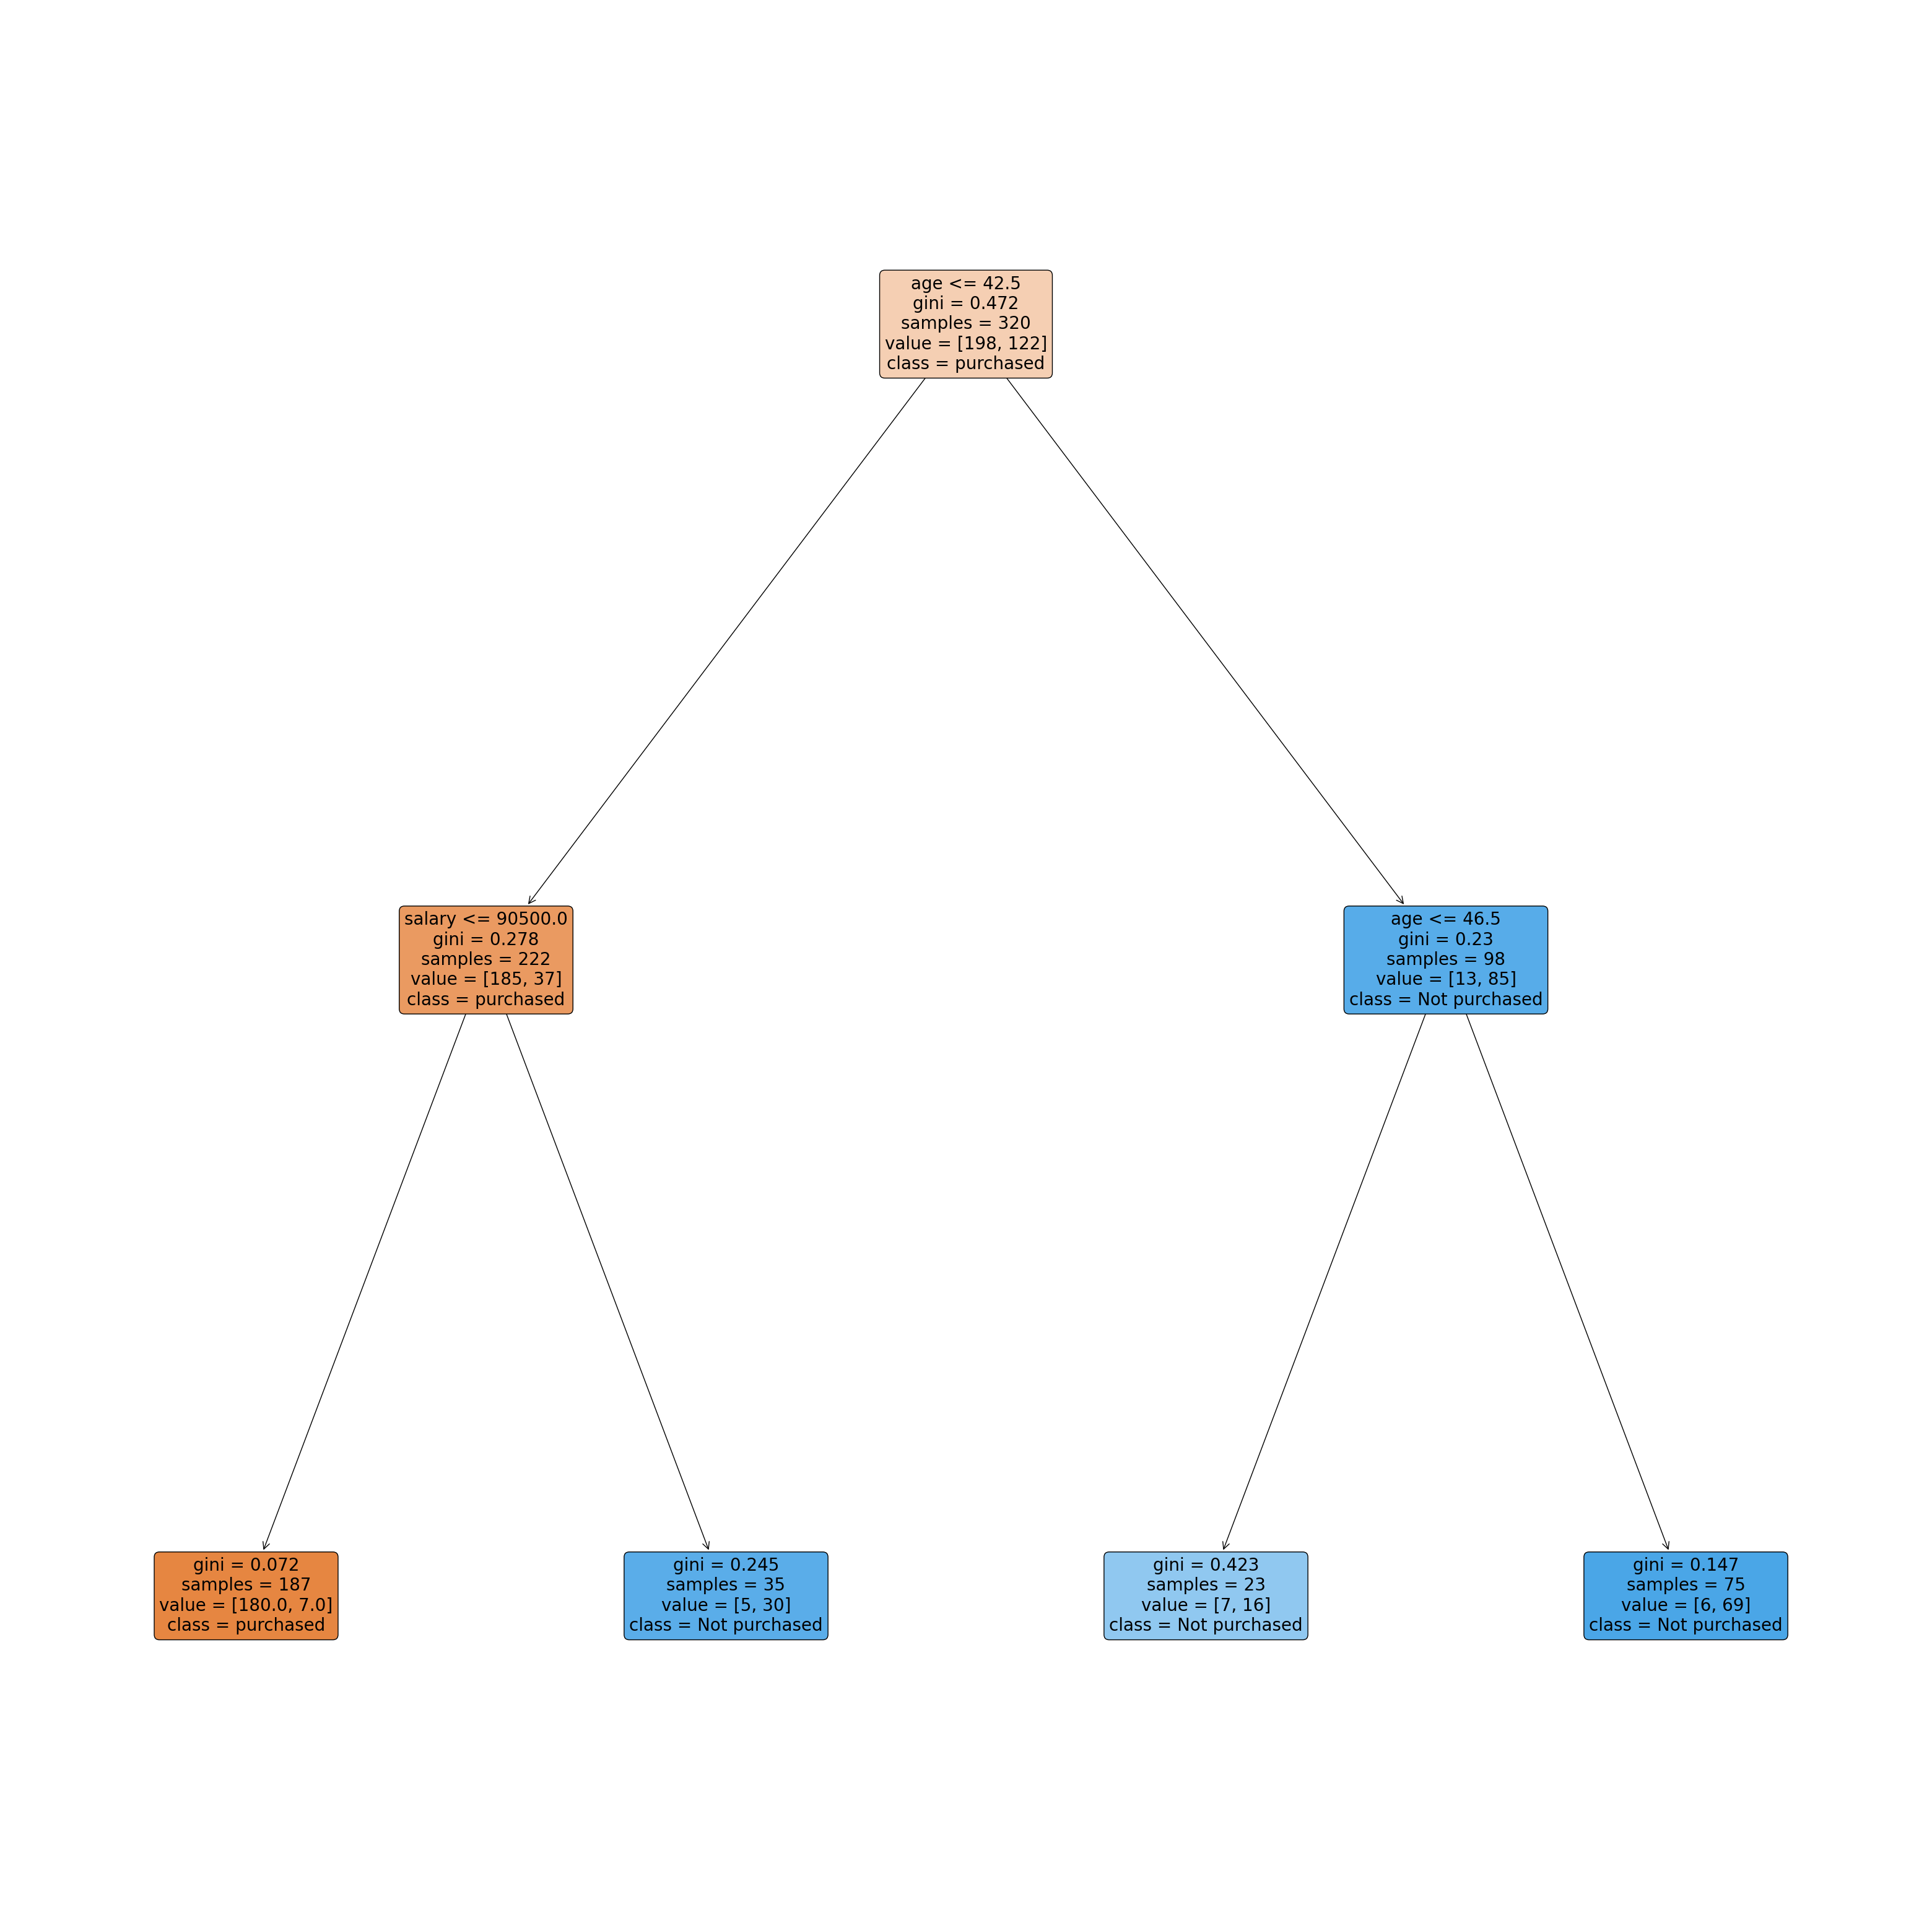

In [315]:
plt.figure(figsize=(40,40))
graph_tree = plot_tree (model_dt,feature_names = ['age','salary'],
                        class_names = ['purchased','Not purchased'],
                        filled=True,rounded=True,fontsize = 20)

In [316]:
accuracy_dt = model_dt.score(X_test,Y_real)  
accuracy_dt

0.8875

In [317]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
accuracy

0.8875

In [318]:
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
precision_dt

0.7307692307692307

In [319]:
recall_dt = metrics.recall_score(Y_real,Y_pred_dt)  
recall_dt

0.9047619047619048

In [320]:
import seaborn as sns
confusion_matrix_dt = metrics.confusion_matrix(Y_real,Y_pred_dt)
confusion_matrix_dt

array([[52,  7],
       [ 2, 19]], dtype=int64)

<Axes: >

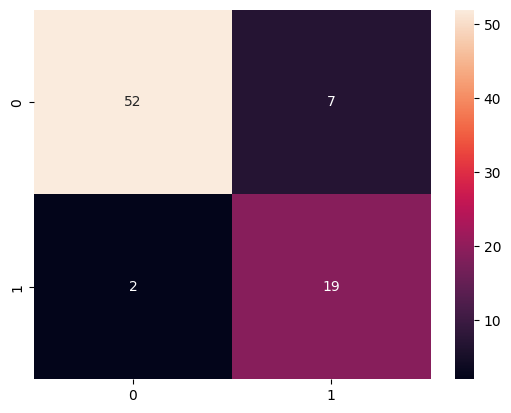

In [321]:
sns.heatmap(confusion_matrix_dt, annot=True)

In [322]:
auc_dt = metrics.roc_auc_score(Y_real, Y_pred_dt) # as the documentation explain, the main parameters are: y_true and y_score
auc_dt

0.8930589184826473

In [323]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [324]:
kf_dt = KFold(n_splits=5,shuffle=True)  
cv_dt = cross_val_score(model_dt, X, Y, cv=kf_dt)
np.mean(cv_dt)

0.9099999999999999

In [325]:
from sklearn.linear_model import LogisticRegression

In [326]:
model_lr = LogisticRegression(solver='liblinear')

In [327]:
model_lr.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [328]:
y_pred_lg = model_lr.predict(X_test)
y_pred_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [329]:
accuracy_lg = model_lr.score(X_test,Y_real) 
accuracy_lg 

0.7375

In [330]:
acc_lg = metrics.accuracy_score(Y_real,y_pred_lg)
acc_lg

0.7375

In [331]:
precision_lg = metrics.precision_score(Y_real,y_pred_lg)  
precision_lg

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [332]:
rec_lg = metrics.recall_score(Y_real, y_pred_lg)
rec_lg

0.0

In [333]:
cm_lg = metrics.confusion_matrix(Y_real,y_pred_lg)
cm_lg

array([[59,  0],
       [21,  0]], dtype=int64)

<Axes: >

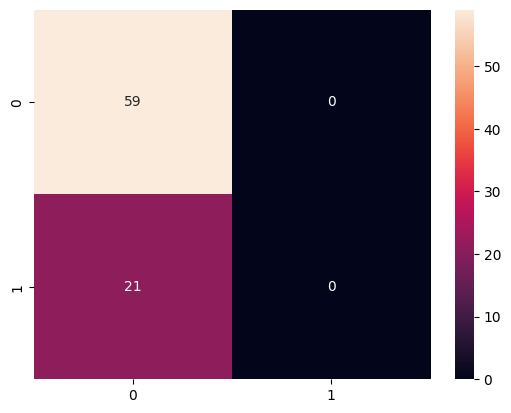

In [334]:
import seaborn as sns
sns.heatmap(cm_lg, annot=True)

In [335]:
auc_lg = metrics.roc_auc_score(Y_real, y_pred_lg) # as the documentation explain, the main parameters are: y_true and y_score
auc_lg

0.5

In [336]:
kf_lg = KFold(n_splits=5,shuffle=True) 

In [337]:
cv_lg = cross_val_score(model_lr, X, Y, cv=kf_lg)
np.mean(cv_lg)

0.6425

In [338]:
from sklearn import svm

In [339]:
model_svc = svm.SVC(kernel="sigmoid")
model_svc

SVC(kernel='sigmoid')

In [340]:
model_svc.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [341]:
Y_pred_svm = model_svc.predict(X_test)
Y_pred_svm

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [342]:
accuracy_svc = model_svc.score(X_test,Y_real) 
accuracy_svc 

0.5

In [343]:
from sklearn import metrics
acc_svc = metrics.accuracy_score(Y_real,Y_pred_svm)
acc_svc

0.5

In [344]:
precision_svc = metrics.precision_score(Y_real,Y_pred_svm)  
precision_svc

0.1935483870967742

In [345]:
rec_svc = metrics.recall_score(Y_real, Y_pred_svm)
rec_svc

0.2857142857142857

In [346]:
cm_svc = metrics.confusion_matrix(Y_real,Y_pred_svm)
cm_svc

array([[34, 25],
       [15,  6]], dtype=int64)

<Axes: >

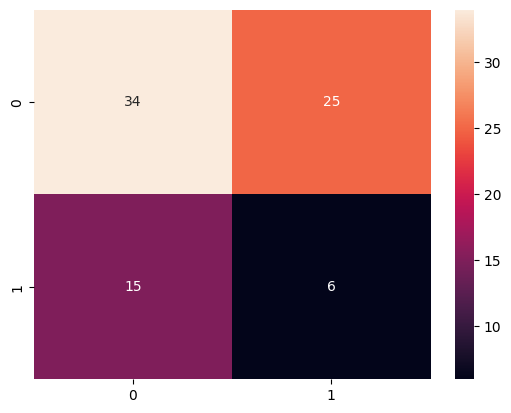

In [347]:
sns.heatmap(cm_svc, annot=True)

In [348]:
auc_svc = metrics.roc_auc_score(Y_real, Y_pred_svm) # as the documentation explain, the main parameters are: y_true and y_score
auc_svc

0.4309927360774818

In [349]:
kf_svc = KFold(n_splits=5,shuffle=True)  

In [350]:
cv_svc = cross_val_score(model_svc, X, Y, cv=kf_svc)
np.mean(cv_lg)

0.6425

In [351]:
model_dt = KMeans(n_clusters=2, random_state=0, n_init="auto")  #clustering into two parts
model_dt

In [352]:
model_dt.fit(X_train,Y_train)

KNeighborsRegressor()

In [353]:
model_dt.predict(X_test)

KNeighborsRegressor()

In [ ]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_dt

array([0.8, 0. , 0.2, 0. , 0. , 0. , 0.4, 0. , 0.4, 0.2, 0.2, 0. , 0.6,
       0.6, 0. , 0.2, 0. , 1. , 0. , 0. , 0.8, 0.6, 0.4, 0.8, 0. , 0. ,
       0.8, 0. , 0.4, 0.2, 0.6, 1. , 0.6, 0. , 0. , 0.8, 0.2, 0.2, 0. ,
       0.2, 0.2, 0. , 0. , 0.4, 0.2, 0.2, 0.4, 1. , 0.4, 0.2, 0. , 0.8,
       0.6, 0. , 0. , 0. , 0.2, 0. , 0. , 0.8, 0.6, 0.4, 0. , 0. , 1. ,
       0. , 0.2, 0.8, 0.2, 0. , 0. , 0.4, 0.6, 0. , 0.8, 1. , 0.6, 0.2,
       0.4, 0.8])

In [355]:
result = pd.DataFrame({"Survided REAL": Y_real, "Survived PREDICTION": Y_pred_dt})
result

In [356]:
accuracy_dt = model_dt.score(X_test,Y_real)  
accuracy_dt

In [357]:

accuracy = metrics.accuracy_score(Y_real,Y_pred_dt)  
accuracy

0.8625

In [358]:
precision_dt = metrics.precision_score(Y_real,Y_pred_dt)  
precision_dt

0.7083333333333334

In [359]:
recall_knn = metrics.recall_score(Y_real, rounding)
recall_knn

0.8095238095238095

In [360]:
cm_knn = metrics.confusion_matrix(Y_real, rounding)
cm_knn

array([[52,  7],
       [ 4, 17]], dtype=int64)

<Axes: >

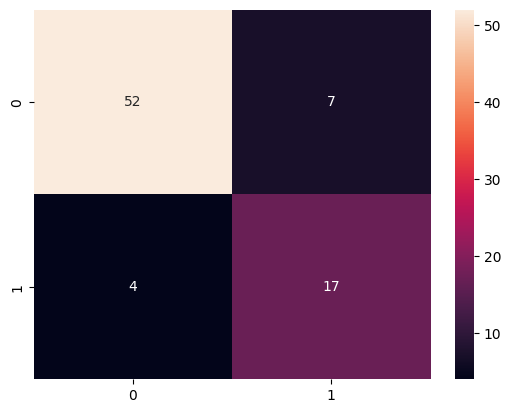

In [361]:
sns.heatmap(cm_knn, annot=True)

In [362]:
auc_knn = metrics.roc_auc_score(Y_real, rounding) # as the documentation explain, the main parameters are: y_true and y_score
auc_knn

0.8454398708635997

In [363]:
kf_neighbors = KFold(n_splits=5,shuffle=True) 

In [364]:
cv_neighbors = cross_val_score(knn_model, X, Y, cv=kf_neighbors)
np.mean(cv_neighbors)

0.37548955918179056

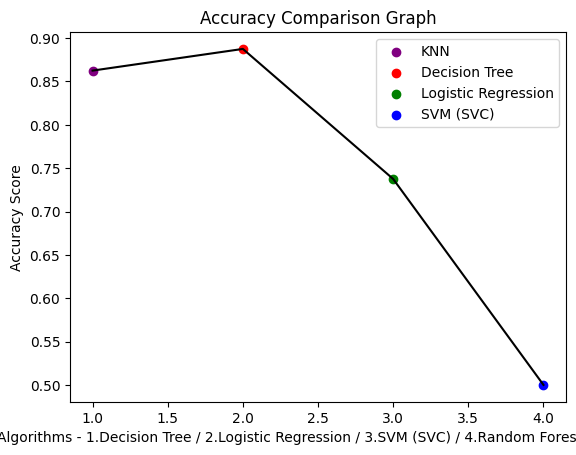

In [365]:
plt.title("Accuracy Comparison Graph")
plt.ylabel("Accuracy Score")

plt.xlabel("Algorithms - 1.Decision Tree / 2.Logistic Regression / 3.SVM (SVC) / 4.Random Forest / 5.KNN")

y = [acc_knn,accuracy_dt,accuracy_lg,acc_svc]

plt.plot([1,2,3,4],y, color = "black")


plt.scatter(1,acc_knn, marker="o", color = "purple",label = "KNN")

plt.scatter(2,accuracy_dt, marker="o", color="red", label="Decision Tree")

plt.scatter(3,accuracy_lg, marker="o", color="green", label="Logistic Regression")

plt.scatter(4,acc_svc, marker="o", color="blue", label="SVM (SVC)")

 
plt.legend()
plt.show()